In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#plotting
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# Exercise
### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [3]:
df_store = acquire.get_store_data()


Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


In [4]:
#testing prepare function

#note that function takes a minute to run from import

df = prepare.prep_store_data(df_store)

In [5]:
#checking
df.isnull().sum()

quantity         0
sale_id          0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
month            0
day_of_week      0
sales_total      0
dtype: int64

In [6]:
df.head(1)

,quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [7]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


In [8]:
#Choo - Choo
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

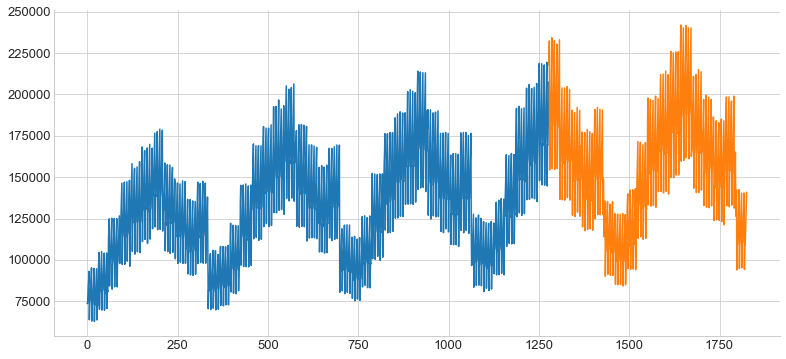

In [9]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [10]:
train = train.set_index('sale_date')

In [11]:
#set this variable to explore
sales_total = train.sales_total
sales_total.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

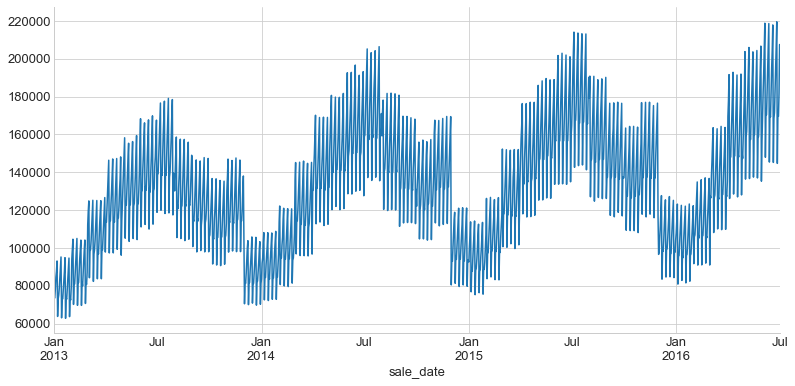

In [12]:
sales_total.plot()

<AxesSubplot:>

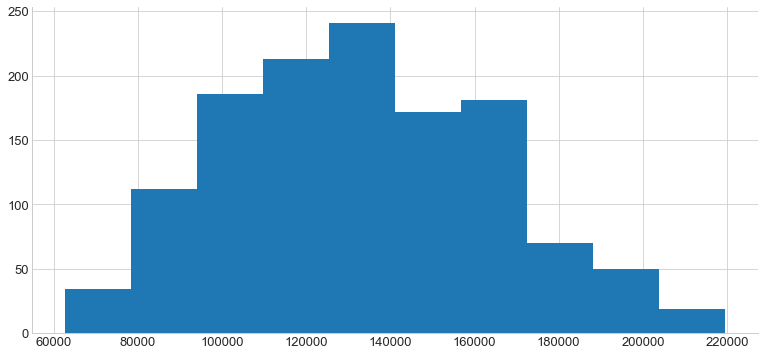

In [13]:
sales_total.hist()

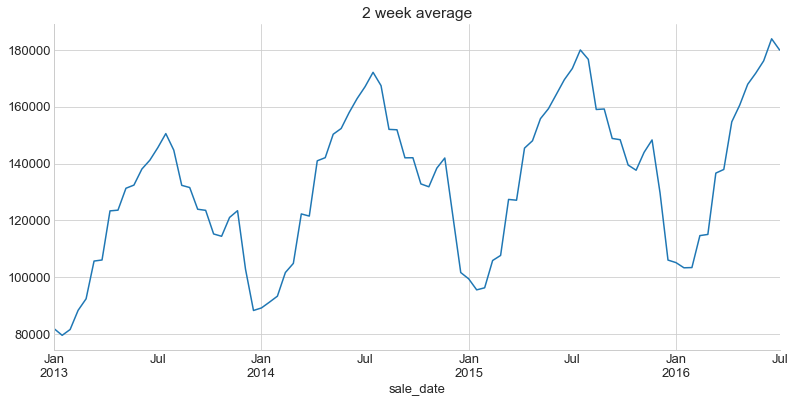

In [14]:
sales_total.resample('2W').mean().plot(title='2 week average');

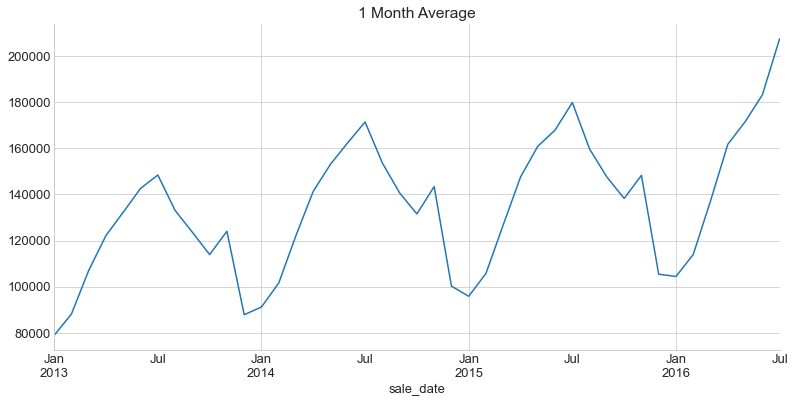

In [15]:
sales_total.resample('1M').mean().plot(title='1 Month Average');

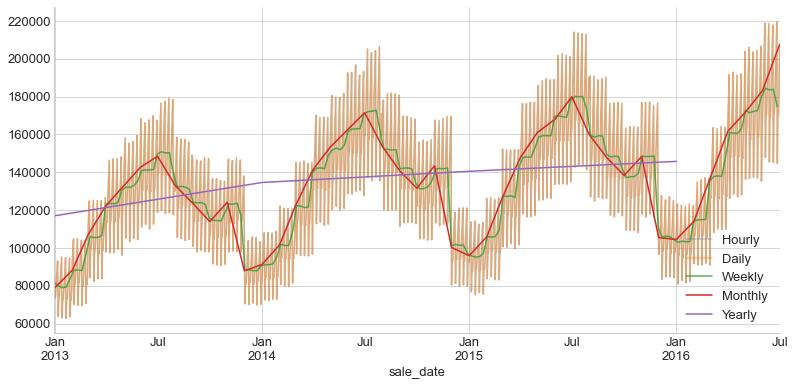

In [16]:
# This doesn't give us anything
ax = sales_total.plot(alpha=.3, label='Hourly')
sales_total.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
sales_total.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
sales_total.resample('M').mean().plot(ax=ax, label='Monthly')
sales_total.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

In [17]:
sales_total.groupby(sales_total.index.month).mean()

sale_date
1      92616.404919
2     102500.861416
3     123347.179677
4     143231.956750
5     154466.339355
6     164049.207583
7     167006.675957
8     148827.419570
9     137279.423333
10    127928.998387
11    138585.456111
12     97863.146129
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

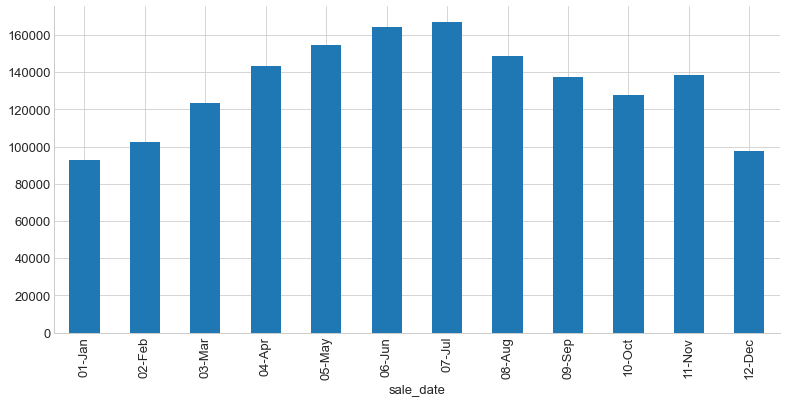

In [18]:
# looking at sales by month
# strftime('%m-%b') is just to have the labels on the bars
sales_total.groupby(sales_total.index.strftime('%m-%b')).mean().plot.bar()


From our data we notice that sales peak in July of the average time frame by year - my notion would be that November and Decemeber would be higher due to the holidays - interesting find in this dataset

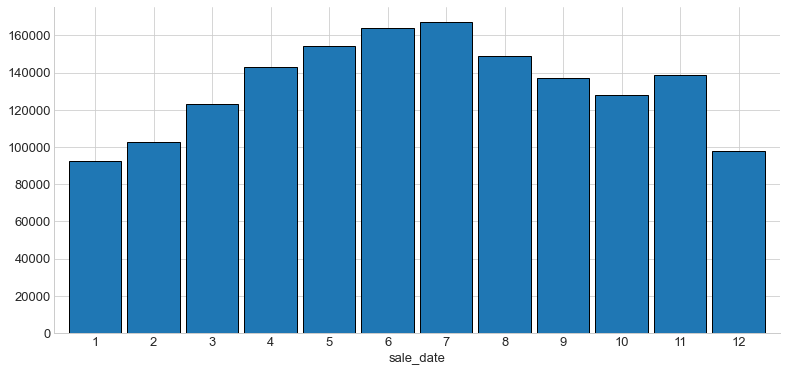

In [19]:
sales_total.groupby(sales_total.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='sales_total');

In [20]:
df.head(1)

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01


In [21]:
#add month to train
train['month'] = train.index.month

<AxesSubplot:xlabel='month'>

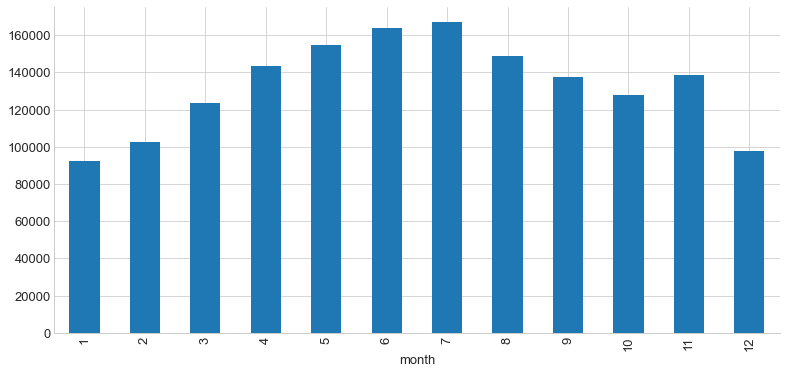

In [22]:
train.groupby('month').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

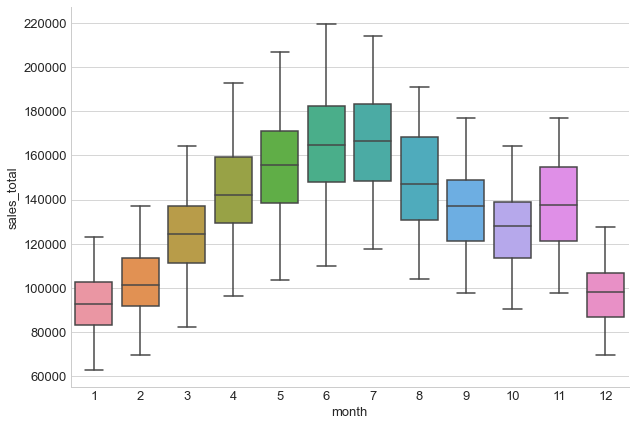

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='month',y='sales_total')

In [24]:
#and weekday
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='weekday'>

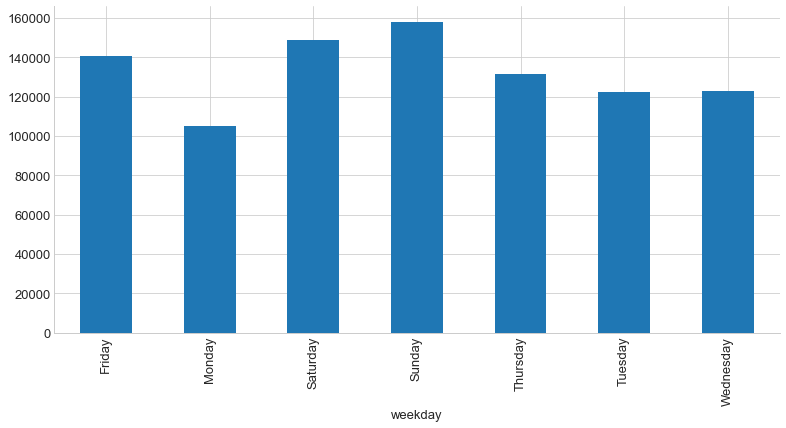

In [25]:
train.groupby('weekday').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

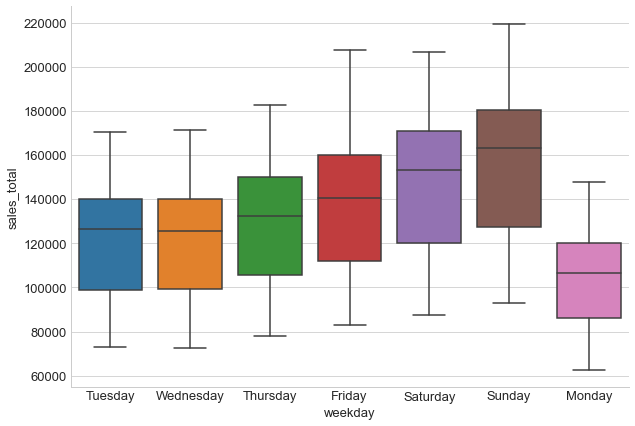

In [26]:
# makes sense that people would typically shop more on the weekends than on Monday
# values still very similar in this graph
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='weekday',y='sales_total')

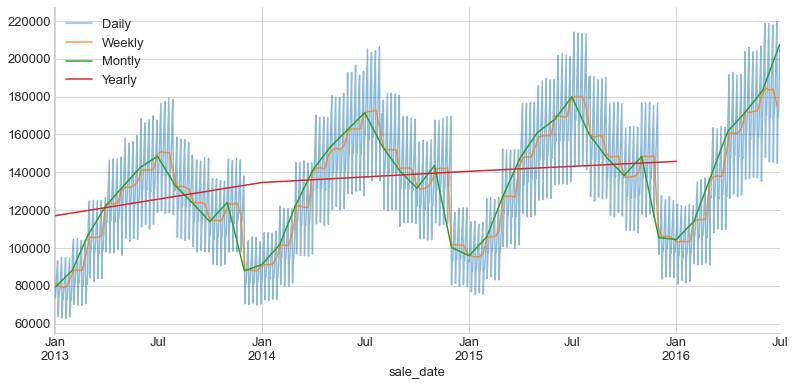

In [27]:
#this is really cool
#plt.figure(figsize=(7,10))
sales_total.resample('D').mean().plot(alpha=.5, label='Daily')
sales_total.resample('W').mean().plot(alpha=.8, label='Weekly')
sales_total.resample('M').mean().plot(label='Montly')
sales_total.resample('Y').mean().plot(label='Yearly')
plt.legend()

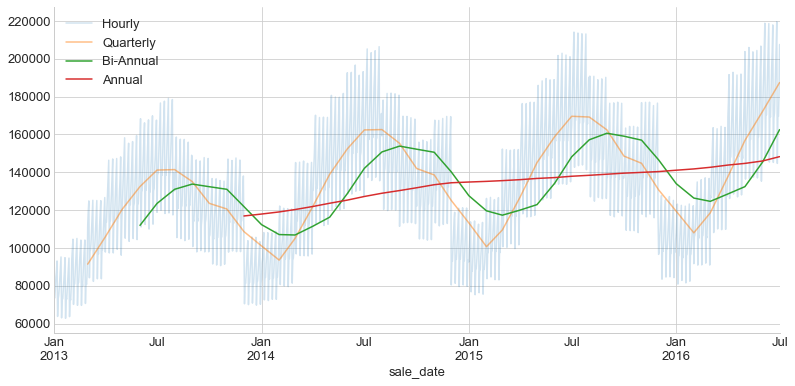

In [29]:
sales_total.plot(alpha=.2, label='Hourly')
sales_total.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='Quarterly')
sales_total.resample('M').mean().rolling(6).mean().plot(alpha=8, label='Bi-Annual')
sales_total.resample('M').mean().rolling(12).mean().plot(alpha=8, label='Annual')

plt.legend()

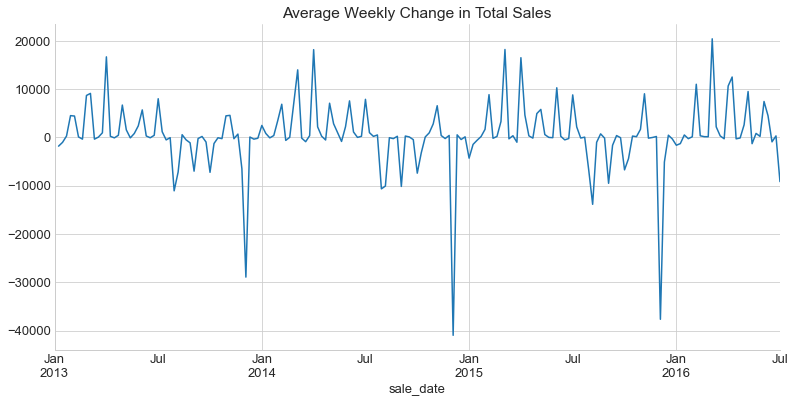

In [30]:
sales_total.resample('W').mean().diff().plot(title='Average Weekly Change in Total Sales');


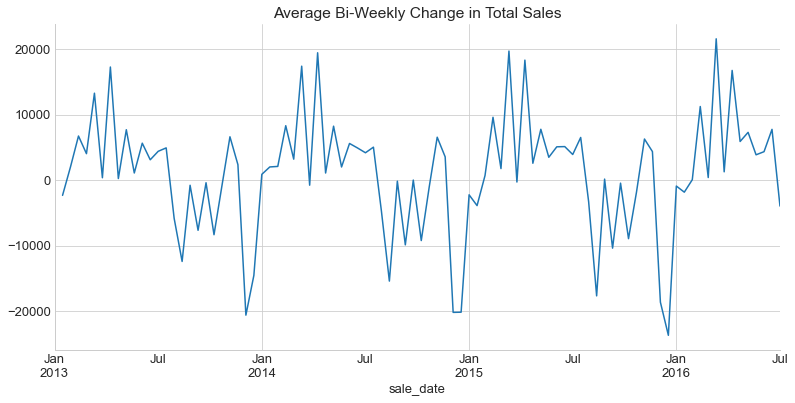

In [31]:
sales_total.resample('2W').mean().diff().plot(title='Average Bi-Weekly Change in Total Sales');


<AxesSubplot:title={'center':'Seasonal Plots'}, xlabel='sale_date'>

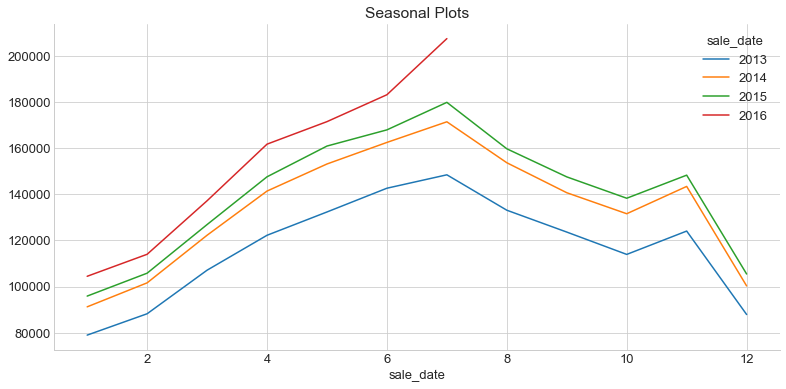

In [32]:
#Seasonal Plot
sales_total.groupby([sales_total.index.year, sales_total.index.month]).mean().unstack(0).plot(title='Seasonal Plots')

In [33]:
#Seasonal Subseries Plot


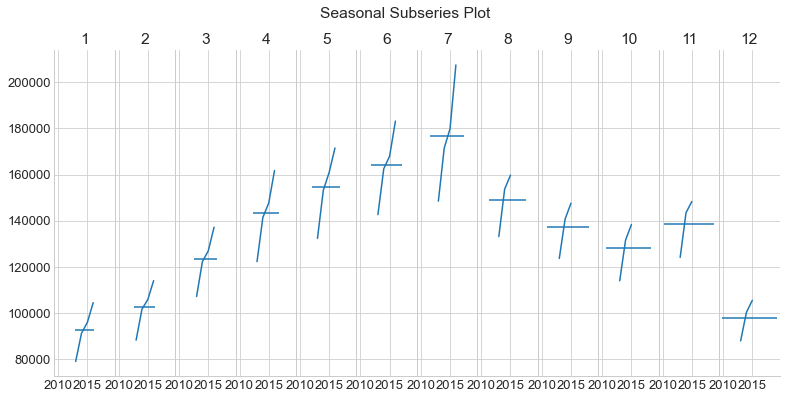

In [34]:
table = sales_total.groupby([sales_total.index.year, sales_total.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

In [35]:
#changing my variable to what's pulled from class code
y = sales_total

Text(0.5, 1.0, 'Lag plot with lag = 1')

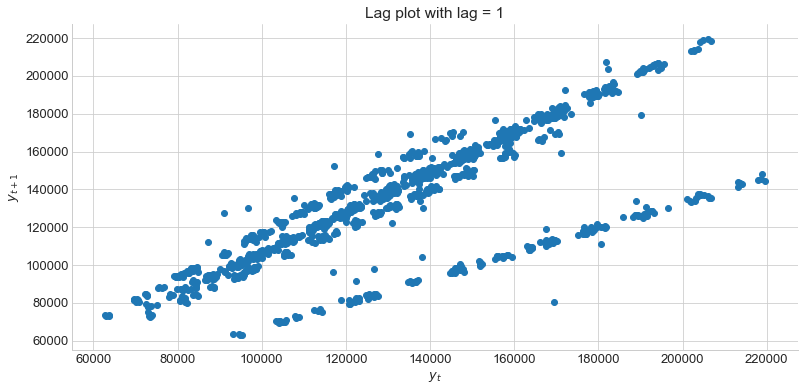

In [36]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

Text(0.5, 1.0, 'Lag plot with t + 1')

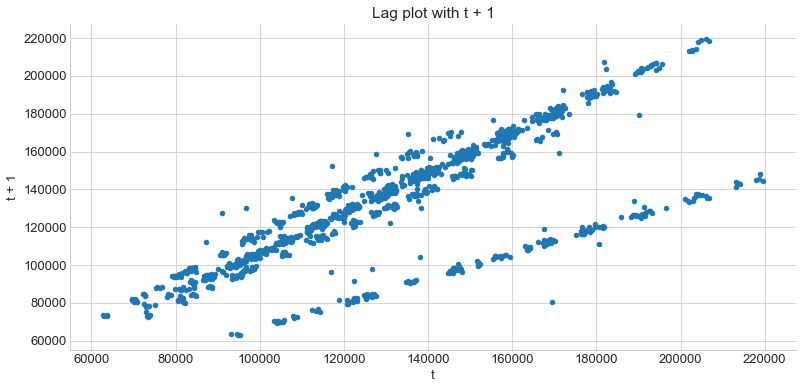

In [37]:
#pulled this - need to understand better
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')
plt.title('Lag plot with t + 1')

,this_week,month,y(t + 1),1_weeks_out
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,1.000000,80116.838333,79990.601429
2013-01-13 00:00:00+00:00,79990.601429,1.000000,79884.427143,78973.360000
2013-01-20 00:00:00+00:00,78973.360000,1.000000,78938.260000,79272.691429
2013-01-27 00:00:00+00:00,79272.691429,1.000000,79398.127143,83792.507143
2013-02-03 00:00:00+00:00,83792.507143,1.428571,84716.047143,88227.801429


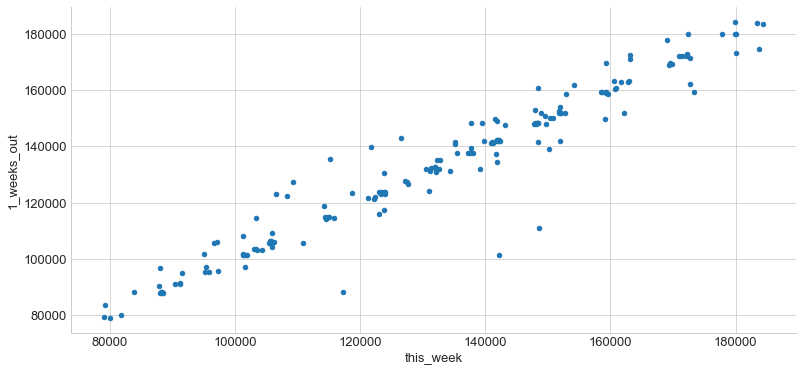

In [38]:
weekly = train.resample('W').mean()
weekly['1_weeks_out'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='1_weeks_out')
weekly.head()

<AxesSubplot:xlabel='this_week', ylabel='half_a_year_later'>

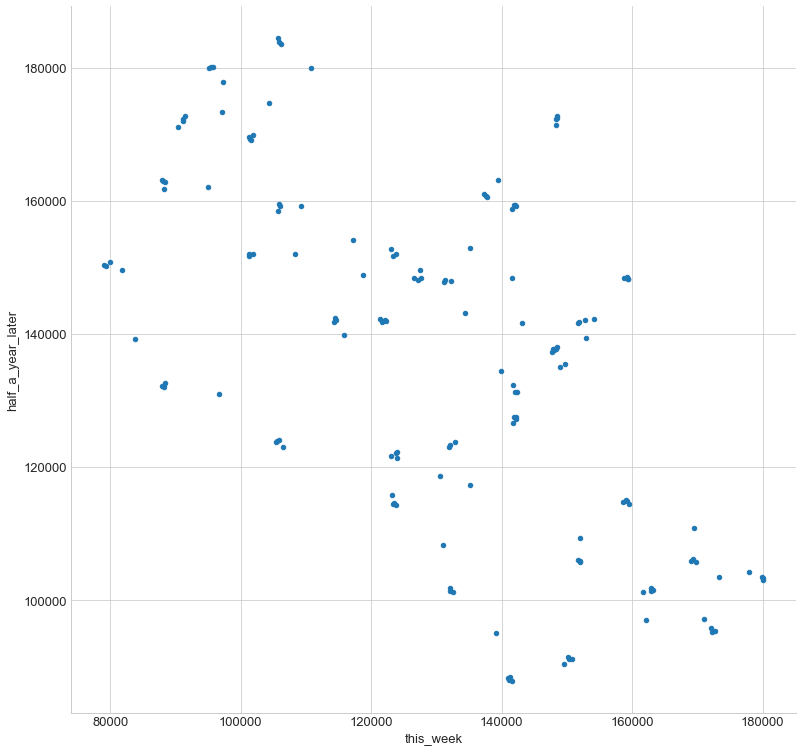

In [39]:
#push it back 6 months - doesn't tell us much

weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))

In [ ]:
#Autocorrelation: Autocorrelation is a measure of the linear relationship between lagged values of a time series. 
#An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

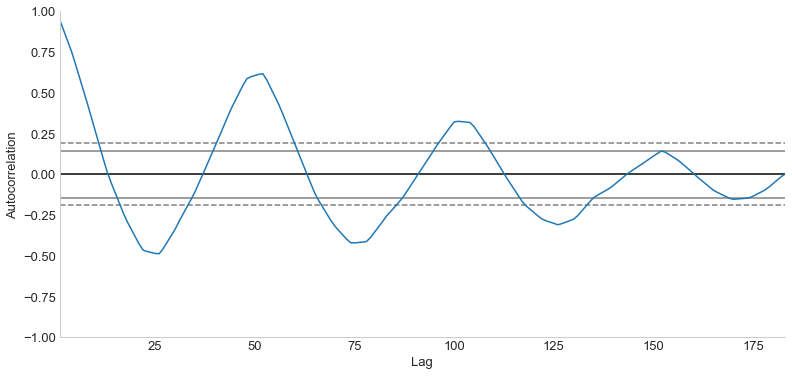

In [40]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [41]:
import statsmodels.api as sm


# seasonal decomposition
y = train.sales_total.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)


In [42]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38901.876390,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38210.382887,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38830.973862,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38827.078436,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36538.820195,NaN


<AxesSubplot:xlabel='sale_date'>

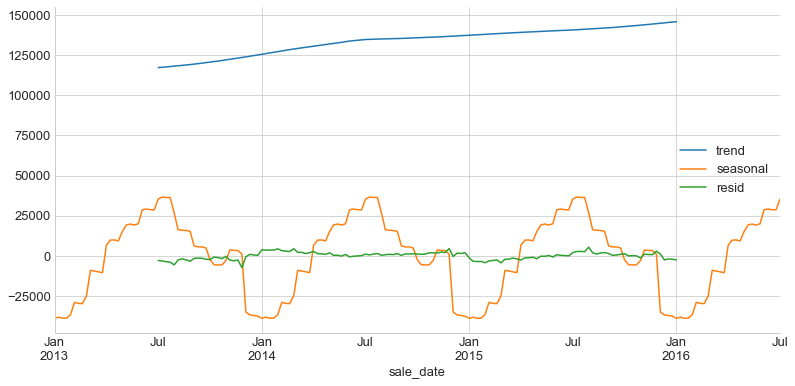

In [43]:
decomposition.iloc[:, 1:].plot()


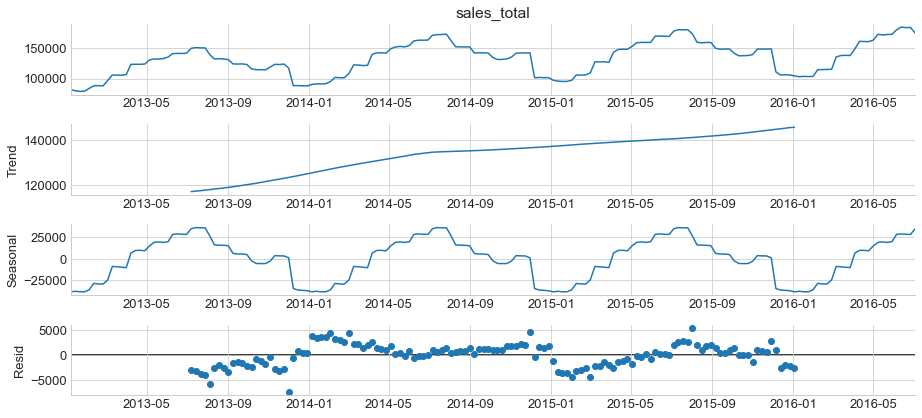

In [44]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [ ]:
# Categories over timne

# OPSD

In [63]:
df = acquire.new_power_data()

Saving data to .csv file


In [64]:
#Function wasn't working properly so pulled info in cells under

def prepare_ops_data(df):
    # read it
    df= pd.read_csv("https://raw.githubusercontent.com/jenfly/df/master/df_germany_daily.csv")
    
    # convert to datetime format for date column
    df.Date = pd.to_datetime(df.Date)
    
    #set the index
    df= df.set_index('Date').sort_index()
    
    # Creating new features from our data
    df['year'] = pd.DatetimeIndex(df.index).year
    df['month'] = pd.DatetimeIndex(df.index).month_name()
    
    #should be no-nas but in case
    df= df.fillna(0)
    
    return df

In [65]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,0.0,0.0,0.0
1,2006-01-02,1380.521,0.0,0.0,0.0
2,2006-01-03,1442.533,0.0,0.0,0.0
3,2006-01-04,1457.217,0.0,0.0,0.0
4,2006-01-05,1477.131,0.0,0.0,0.0


In [66]:
# convert to datetime format for date column
df.Date = pd.to_datetime(df.Date)
#set the index
df= df.set_index('Date').sort_index()
df.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [68]:
#Creating new features from our data
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month_name

In [69]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-02,1380.521,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-03,1442.533,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-04,1457.217,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-05,1477.131,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...


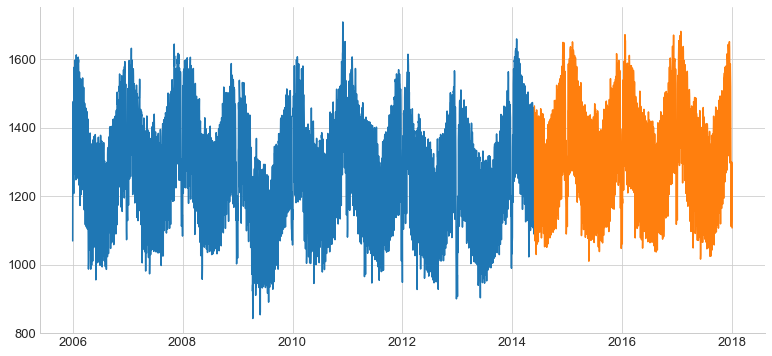

In [71]:
#manually splitting it

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [76]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-02,1380.521,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-03,1442.533,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-04,1457.217,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...
2006-01-05,1477.131,0.0,0.0,0.0,2006,<bound method inherit_from_data.<locals>.metho...


In [77]:
y = train.Consumption

<AxesSubplot:ylabel='Frequency'>

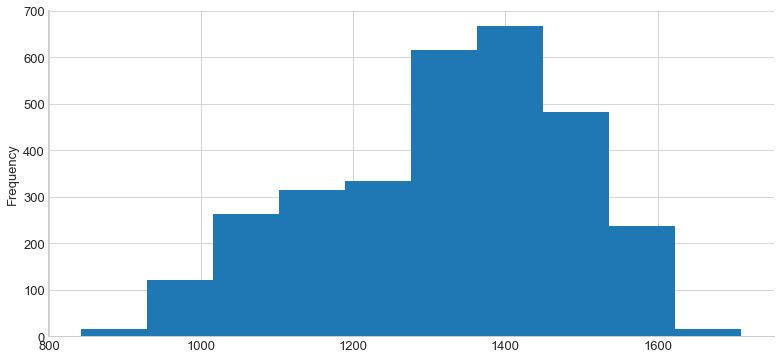

In [78]:
y.plot.hist()

[Text(0.5, 1.0, 'Average consumption by weekday'),
 Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'Consumption')]

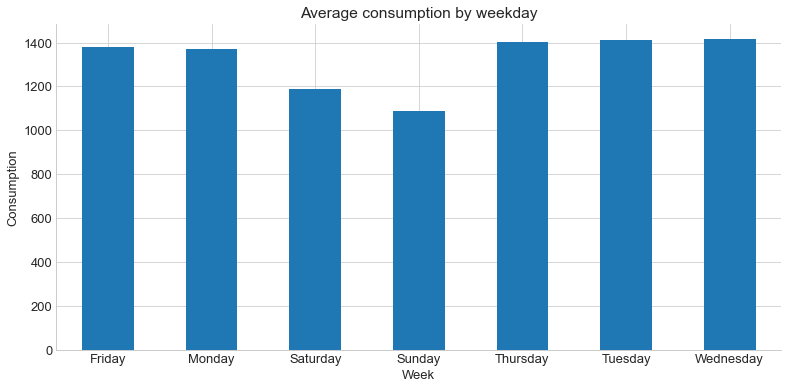

In [83]:
ax = y.groupby(y.index.day_name()).mean().plot.bar()
plt.xticks(rotation=0)
ax.set(title='Average consumption by weekday', xlabel= 'Week', ylabel = 'Consumption')

[Text(0.5, 1.0, 'Average consumption by month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

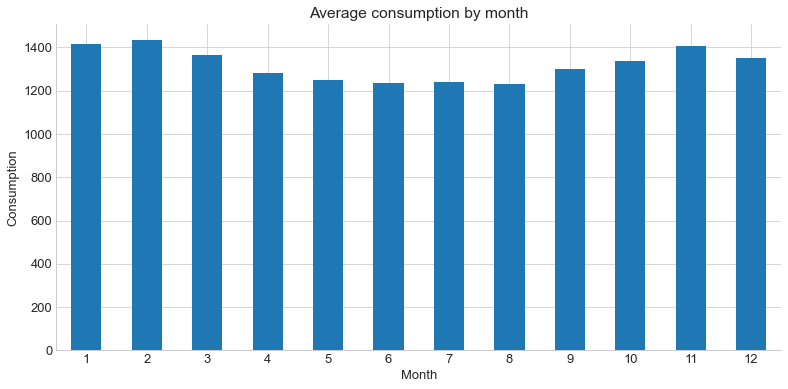

In [85]:
ax = y.groupby(y.index.month).mean().plot.bar()
plt.xticks(rotation=0)
ax.set(title='Average consumption by month', xlabel= 'Month', ylabel = 'Consumption')

[Text(0.5, 1.0, 'Average consumption by year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Consumption')]

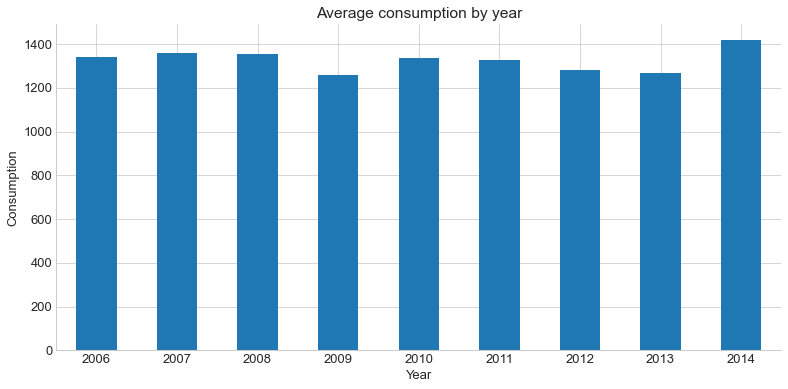

In [86]:
ax = y.groupby(y.index.year).mean().plot.bar()
plt.xticks(rotation=0)
ax.set(title='Average consumption by year', xlabel= 'Year', ylabel = 'Consumption')

<AxesSubplot:xlabel='month', ylabel='Consumption'>

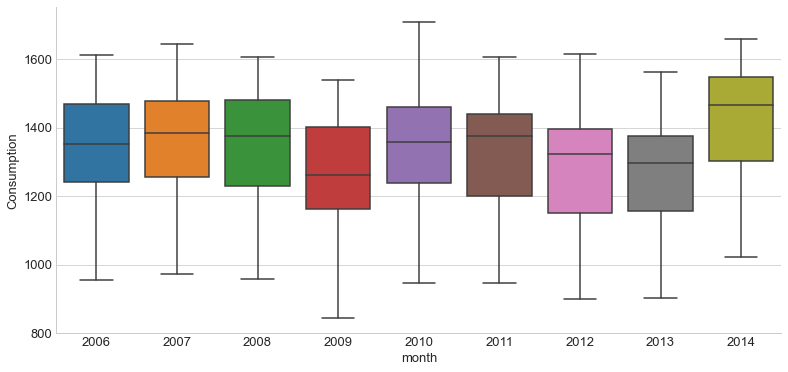

In [90]:
sns.boxplot(data=train, x='month', y='Consumption')

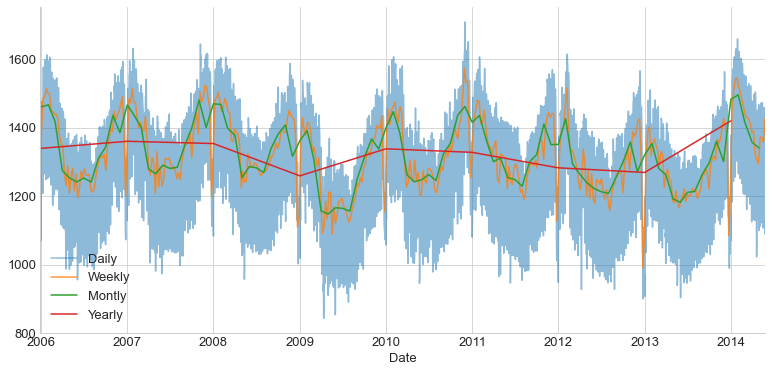

In [91]:
#this is really cool
#plt.figure(figsize=(7,10))
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

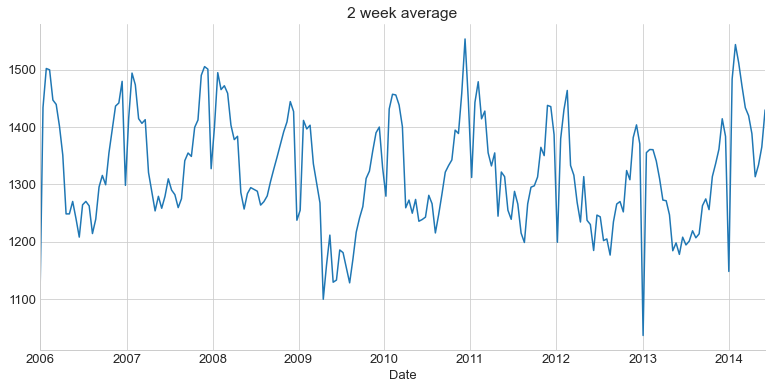

In [92]:
y.resample('2W').mean().plot(title='2 week average');

In [ ]:
y.groupby